<a href="https://colab.research.google.com/github/du6293/project/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(1)_%EA%B8%B0%EC%98%A8%EB%B3%80%ED%99%94_%ED%95%99%EC%83%9D%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트(1)

## 먼저 필요한 라이브러리들을 import 하고 환경을 만듭니다

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 나눔바른고딕 폰트 설치 - [런타임 다시 시작]되면 폰트를 다시 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

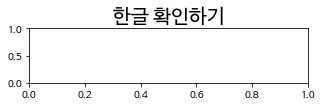

In [ ]:
# 한글이 잘 보이는지 확인하기
plt.figure(figsize=(5,1))
plt.title('한글 확인하기', fontsize=20)
plt.show()

In [ ]:
plt.rc('font', family = 'NanumBarunGothic')
# 마이너스(음수)부호 설정
plt.rc("axes", unicode_minus = False)

# 1.춘천의 기온 데이터 분석하기

### 1-0.데이터파일 준비

In [ ]:
file_path = "/content/춘천기온데이터.csv"

## 1-1.기온이 가장 높은 날

### (1) csv를 이용해 봅시다

csv모듈을 이용해 파일 읽는 연습을 해 봅시다.
- file을 read모드로 오픈하고 csv.reader()로 읽어옵니다.
- 기온이 가장 높았던 날짜와 기온을 출력합니다.

In [ ]:
import csv  # csv : ,로 이루어진 파일

with open (file_path,'r',encoding = "cp949") as f:
  data = csv.reader(f)

  for row in data:
    print(row)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['2008-05-04', '101', '17.4', '13.9', '22.1']
['2008-05-05', '101', '16.9', '10.4', '22.4']
['2008-05-06', '101', '15.9', '6.4', '24.1']
['2008-05-07', '101', '13.2', '7.3', '20.9']
['2008-05-08', '101', '16.7', '11.7', '24.8']
['2008-05-09', '101', '16.1', '9.4', '21.4']
['2008-05-10', '101', '13', '6.2', '19.5']
['2008-05-11', '101', '14', '5.2', '23']
['2008-05-12', '101', '14.1', '8.5', '19.4']
['2008-05-13', '101', '12', '8.9', '15.5']
['2008-05-14', '101', '13.5', '7.7', '17.6']
['2008-05-15', '101', '13.8', '6', '21.2']
['2008-05-16', '101', '14.9', '6.5', '22.9']
['2008-05-17', '101', '16.7', '8.5', '25.1']
['2008-05-18', '101', '12.6', '10.9', '14.3']
['2008-05-19', '101', '13.6', '8.4', '19.2']
['2008-05-20', '101', '14', '7.1', '22.5']
['2008-05-21', '101', '15.4', '9.6', '22.7']
['2008-05-22', '101', '19', '10.9', '27.1']
['2008-05-23', '101', '20.4', '15.5', '25.5']
['2008-05-24', '101', '21.1', '15.3', '29.4']
['2008-05-25', '101', '21.

데이터 구성['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 2018-08-01로 기온은 39.5도 였습니다.


- 기온이 가장 높았던 날짜와 기온, 가장 낮았던 날짜와 기온을 모두 출력합니다.

In [ ]:
# dataset = ['날짜','지점','평균기온','최저기온','최고기온']
# 기온이 가장 높았던 날
max_temp = -999
max_date = ''
min_temp = 0
min_date = ''

with open(file_path, 'r',encoding = 'cp949') as f:
  data = csv.reader(f)
  header = next(data)  
  print(f'데이터구성[header]') 

  for row in data:
    if row[-1] == '':
      row[-1] = -999

    row[-1] = float(row[-1])
    if max_temp < row[-1]:
      max_temp = row[-1]
      max_date = row[0]

  

    for row in data:
      if row[-1] == '':
        row[-1] = -1000

      row[-1] = float(row[-1])
      if min_temp > row[-1]:
        min_temp = row[-1]
        min_date = row[0]
        row[3] = float(row[3])
      if row[3] < min_temp:
        min_temp = row[3]
        min_date= row[0]


print(f'1997년 이후로 춘천에서 최고 기온이 가장 높았던 날은 {max_date}, 그때의 기온은  {max_temp}였습니다.')
print(f'1997년 이후로 춘천에서 최고 기온이 가장 낮았던 날은 {min_date}, 그때의 기온은  {min_temp}였습니다.')

데이터구성[header]


TypeError: ignored

- 기온이 비어있는 날, 춘천의 최고온도 리스트를 만들고자 한다

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
2018-08-01에 최고온도는 39.5도였고,2001-01-15에 최저온도 -24.5도였습니다.
최고기온이 관측되지 않은 날: []
최고기온: [4.2, -5.1, -1.2, 0.4, 2.8, -3.4, -2.4, -2.9, -1.9, 1.0, 1.0, 1.1, 0.1, 1.5, -1.7, 3.2, 3.3, 1.9, 1.1, 4.7, -1.5, -1.8, -1.7, -0.5, 0.3, 5.8, 2.2, -0.5, -0.5, 1.5, -1.8, 2.5, 2.5, 3.8, 4.2, 5.3, 2.8, 4.9, 5.9, 9.6, 3.5, 1.8, 2.8, 4.5, 7.3, 7.8, 1.3, 2.8, 2.0, 6.9, 9.3, 4.3, 7.5, 10.4, 14.0, 4.0, 12.4, 15.3, 4.8, 10.3, 5.6, 6.6, 8.8, 14.6, 5.1, 12.5, 12.9, 14.7, 10.1, 15.9, 17.6, 20.9, 10.2, 5.3, 6.1, 12.0, 13.5, 15.1, 17.0, 14.8, 13.9, 6.4, 12.6, 16.5, 17.2, 19.4, 18.6, 16.8, 8.2, 11.7, 18.1, 11.4, 13.4, 13.1, 17.3, 12.0, 20.5, 18.7, 15.8, 17.9, 17.7, 20.1, 22.4, 22.9, 19.9, 18.5, 13.2, 20.0, 21.7, 23.4, 23.0, 21.1, 21.2, 21.0, 21.1, 23.5, 23.5, 22.8, 19.7, 23.1, 24.0, 24.1, 28.2, 21.1, 28.8, 21.7, 19.7, 12.9, 21.3, 23.2, 24.9, 21.7, 16.0, 17.6, 22.8, 23.7, 23.7, 25.4, 19.9, 18.2, 19.0, 22.6, 15.2, 15.5, 22.6, 21.9, 23.7, 23.1, 19.0, 19.2, 23.9, 28.6, 21.2, 24.

### (2) pandas를 이용해 봅시다

- 앞에서처럼 chuncheon_high리스트에 일일이 append하지 않고 한 번에 list를 만들고 싶다

In [ ]:
# pandas csv 파일 읽고 데이터 프레임 만들고 head( )5개 데이터 출력
import pandas as pd



In [ ]:
cch_df.info()

NameError: ignored

In [ ]:
cch_df.describe()

NameError: ignored

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,9141.0,9140.000000,9141.000000,9141.000000
mean,101.0,11.608031,6.451176,17.626124
std,0.0,10.814143,11.395107,10.743449
min,101.0,-18.400000,-24.500000,-10.400000
25%,101.0,2.100000,-2.900000,8.000000
50%,101.0,12.800000,6.800000,19.400000
75%,101.0,21.400000,16.700000,27.000000
max,101.0,32.800000,27.600000,39.500000


In [ ]:
# 최고기온만 뽑아서 리스트를 만듭니다
cch_high = ['최고기온(c)'].tolist()
print(cch_high)

AttributeError: ignored

In [ ]:
# 몇 년 간의 최고기온 중에서도 가장 높았던 기온을 찾습니다
cch_df.max()

39.5


In [ ]:
# 기술통계량에서 최고 기온 중 가장 높았던 기온을 찾을 수도 있습니다
cch_df.describe()['최고기온(c)'].['max']

39.5


**최고 기온이었던 날은 언제일까요? 찾아봅시다.**

In [ ]:
print(cch_df.[cch_df['최고기온(c)']==cch_df['최고기온(c)'].max()]['날짜'])
print(cch_df.loc[cch_df['최고기온(c)']==cch_df['최고기온(c)'].max()]['날짜'])

              날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
7882  2018-08-01  101     31.5     24.4     39.5


In [ ]:
print(cch_df.loc[cch_df['최고기온(c)']==cch_df['최고기온(c)'].max()]['날짜'])

7882    2018-08-01
Name: 날짜, dtype: object


In [ ]:
# 좀 더 쉬운 방법
idx = cch_df['최고기온(C)'].idxmax( )  #argmax()
date = cch_df.loc[idx]['날짜']
degree = cch_df.loc[idx]['날짜']['최고기온(c)']
print(f'춘천은 [date]에 [degree]도로 기온이 가장 높았습니다.')

춘천은 2018-08-01에 39.5도로 기온이 가장 높았습니다


## 1-2.기온변화그래프

### pandas,matplotlib 사용해서 최고기온 그래프 그리기

In [ ]:
cch_df = pd.read_csv(file_path, encoding = 'cp949')
cch_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
2,1997-01-03,101,-8.1,-14.0,-1.2
3,1997-01-04,101,-6.8,-13.0,0.4
4,1997-01-05,101,-2.1,-5.4,2.8


In [ ]:
cch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       9141 non-null   object 
 1   지점       9141 non-null   int64  
 2   평균기온(℃)  9140 non-null   float64
 3   최저기온(℃)  9141 non-null   float64
 4   최고기온(℃)  9141 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 357.2+ KB


In [ ]:
# 최고기온
cch_high = cch_df['최고기온(℃)'].tolist()


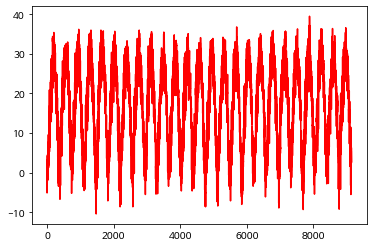

In [ ]:
# 최고기온을 그래프로 그립니다
# ==> 최고기온 뿐만 아니라, 최저기온, 평균기온 그래프도 그려봅시다

# 그래프 색깔도 파란색으로 바꿔봅시다
# r:red, g:green, b:blue, k:black, y:yellow
import matplotlib.pyplot as plt
plt.plot(cch_high,'r')
plt.show()



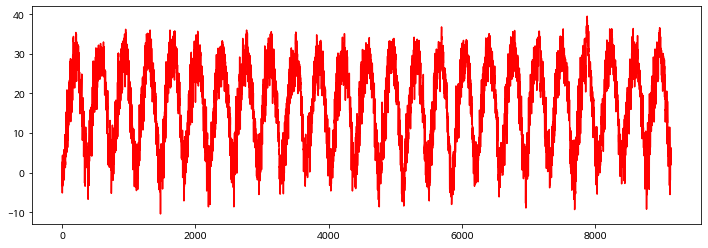

In [ ]:
# 그래프 크기를 바꿔봅시다(figsize)

plt.figure(figsize = (12,4))
plt.plot(cch_high,'r')
plt.show()

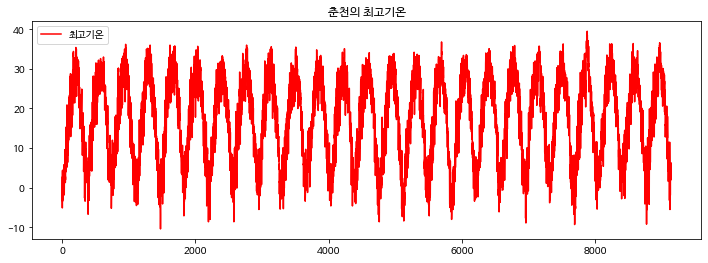

In [ ]:
# 그래프에 '춘천의 최고 기온'이라고 제목을 넣습니다

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(cch_high,'r',label = '최고기온')
plt.title("춘천의 최고기온")
plt.legend()
plt.show()

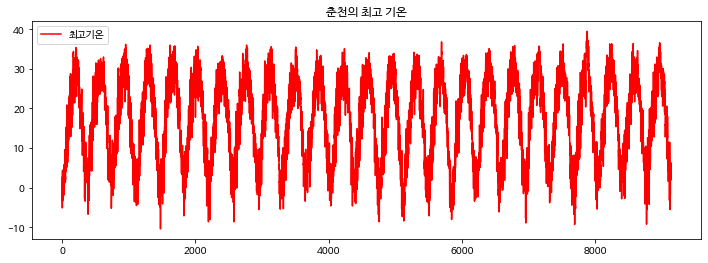

In [ ]:
# 범례를 넣어봅시다.
#위의것과 합침


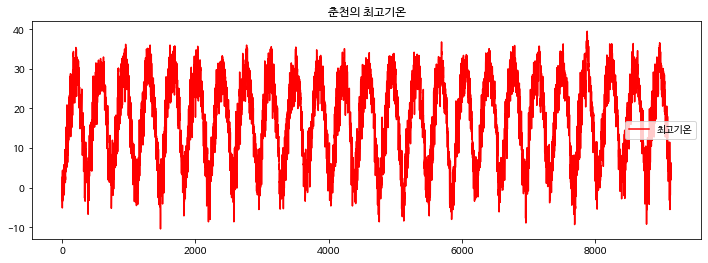

In [ ]:
# 범례의 위치를 지정해 봅니다 (loc)
# 2, 9, 1
# 6, 10, 5/7
# 3, 8, 4
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(cch_high,'r',label = '최고기온')
plt.title("춘천의 최고기온")
plt.legend(loc = 5)
plt.show()


### [미션] 최저기온, 평균기온 그래프도 그려봅시다

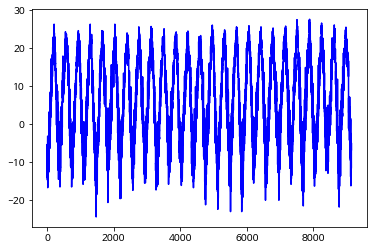

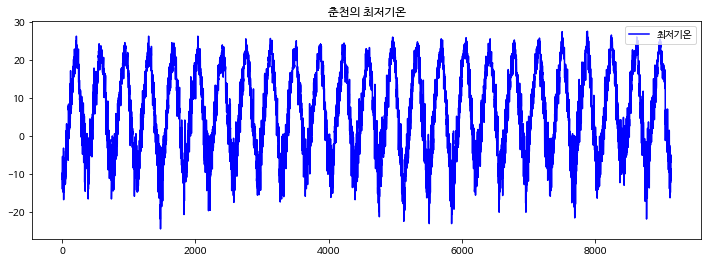

In [ ]:
# 최저기온
cch_low = cch_df['최저기온(℃)'].tolist()
import matplotlib.pyplot as plt
plt.plot(cch_low,'b')
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(cch_low,'b',label = '최저기온')
plt.title("춘천의 최저기온")
plt.legend(loc = 1)
plt.show()


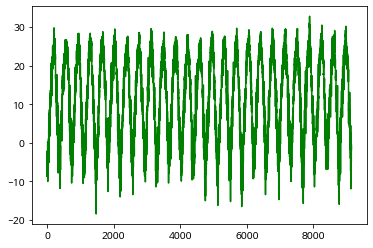

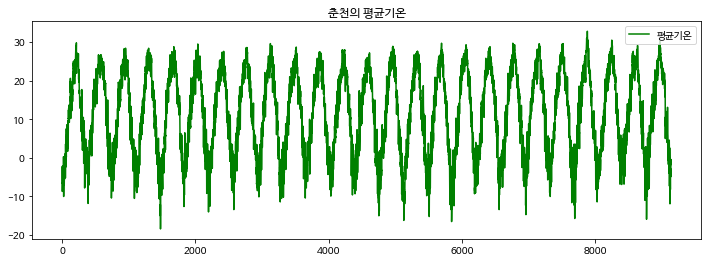

In [ ]:
cch_m = cch_df['평균기온(℃)'].tolist()
plt.plot(cch_m,'g')
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(cch_m,'g',label = '평균기온')
plt.title("춘천의 평균기온")
plt.legend(loc = 1)
plt.show()

### X축에 일련번호가 아닌 날짜 넣기

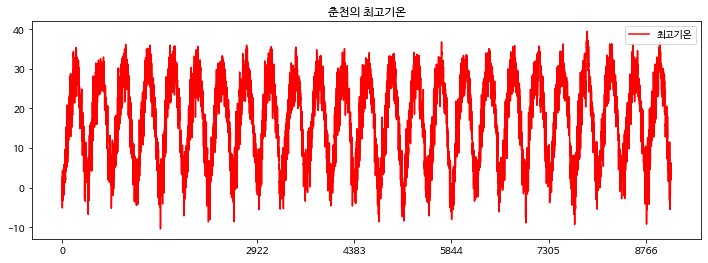

In [ ]:


import pandas as pd
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(cch_high,'r',label = '최고기온')

plt.title("춘천의 최고기온")
plt.legend(loc = 1)
plt.xticks([0.1461,2922,4383,5844,7305,8766])
plt.show()



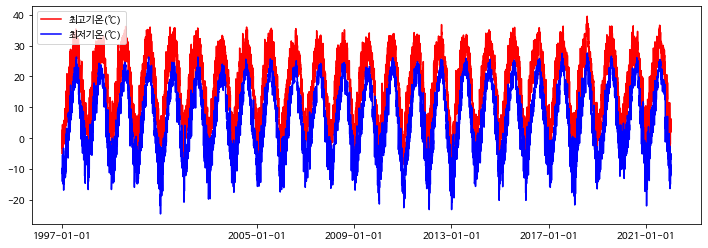

In [ ]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(cch_df['날짜'],cch_df['최고기온(℃)'],'r',label = '최고기온(℃)')
plt.plot(cch_df['최저기온(℃)'],'b',label = '최저기온(℃)')
plt.xticks([0.1461,2922,4383,5844,7305,8766])
plt.legend(loc = 2)
plt.show()

In [ ]:
# 위의 그래프를 보면 x축이 일련번호(인덱스)인 것을 볼 수 있습니다
# 날짜에서 '월'만 뽑아 인덱스로 만듭니다.
cch_df.cch_df
cch_df.set_index('월',inplace=True)
cch_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
1,1997-01-03,101,-8.1,-14.0,-1.2
1,1997-01-04,101,-6.8,-13.0,0.4
1,1997-01-05,101,-2.1,-5.4,2.8


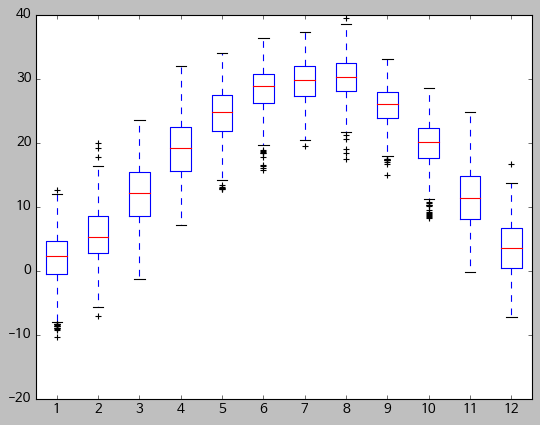

In [ ]:
# 각 월별로 최고기온을 boxplot으로 그려봅니다
fix.ax = plt.subplots()

ax.boxplot([cch_df.loc[i]['최고기온(℃)']for i in range(1,13)])


## 1-3. 내 생일의 기온변화

### (1) csv를 이용해 봅시다

[5.9, 0.4, 9.3, -4.2, 0.4, 4.8, 3.7, 5.8, 6.8, -2.1, 4.8, 2.2, 8.5, 3.6, 8.6, -3.3, -4.4, 3.0, 1.7, 3.7, 2.8, 1.8, 0.9, 4.5, 2.0]


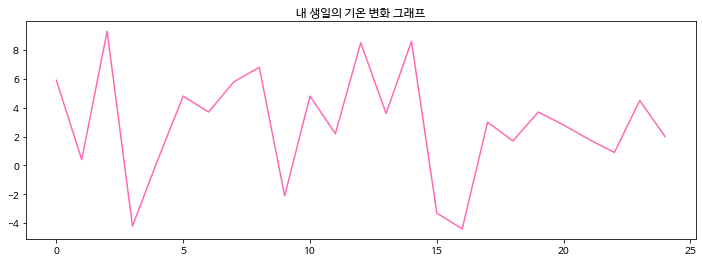

In [ ]:
# 내 생일(2월 8일) 최고기온 데이터만 모아서 그래프로 나타내 봅니다

file = 

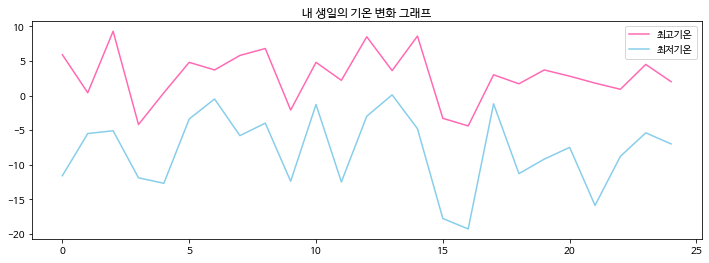

In [ ]:
# 내 생일(2월 8일)의 최고기온(빨간색)과 최저기온(파란색) 데이터만 모아서 그래프로 나타내 봅니다




### (2) pandas를 이용해 봅니다

In [ ]:
# 날짜를 가지고 'new_Date'라는 컬럼을 만들어 봅니다

cch_df['new_Date'] = pd.to_datetime(cch_df['날짜'])
cch_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date
0,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01
1,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02
2,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03
3,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04
4,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05


In [ ]:
# new_Date에서 '월'만 뽑아내서 Month라는 칼럼을 만들어 추가해 봅니다

cch_df['월'] = pd.to_datetime(cch_df['날짜']).dt.month
cch_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,월
0,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01,1
1,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02,1
2,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03,1
3,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04,1
4,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05,1


In [ ]:
# new_Date를 인덱스로 지정합니다
cch_df.set_index('new_Date',inplace=True)
cch_df.head()



,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월
new_Date,,,,,,
1997-01-01,1997-01-01,101,-2.4,-9.8,4.2,1
1997-01-02,1997-01-02,101,-8.7,-11.1,-5.1,1
1997-01-03,1997-01-03,101,-8.1,-14.0,-1.2,1
1997-01-04,1997-01-04,101,-6.8,-13.0,0.4,1
1997-01-05,1997-01-05,101,-2.1,-5.4,2.8,1


In [ ]:
# '2000년 2월'에 해당하는 행만 인덱싱해 봅니다
cch_df.loc['2000-02']


,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월
new_Date,,,,,,
2000-02-01,2000-02-01,101,-8.0,-14.8,-1.4,2
2000-02-02,2000-02-02,101,-6.5,-13.4,2.5,2
2000-02-03,2000-02-03,101,-5.1,-11.0,0.9,2
2000-02-04,2000-02-04,101,-4.9,-11.5,3.2,2
2000-02-05,2000-02-05,101,-3.1,-10.2,2.2,2
2000-02-06,2000-02-06,101,0.3,-3.9,4.6,2
2000-02-07,2000-02-07,101,-2.2,-5.8,2.6,2
2000-02-08,2000-02-08,101,-7.6,-11.9,-4.2,2
2000-02-09,2000-02-09,101,-7.1,-14.6,1.0,2


In [ ]:
# 이번에는 '월'를 인덱스로 지정해 봅니다
# 월을 인덱스르로 하고 new_Date는 삭제
cch_df.set_index('월',inplace = True)
cch_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
1,1997-01-03,101,-8.1,-14.0,-1.2
1,1997-01-04,101,-6.8,-13.0,0.4
1,1997-01-05,101,-2.1,-5.4,2.8
...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5
1,2022-01-07,101,-4.9,-11.7,5.1
1,2022-01-08,101,-3.0,-11.3,3.0


In [ ]:
# 인덱스값 중에 unique한 값만 찾아봅니다 (여기서는 1월~12월까지 12개)  # 중복되면 1개만 보여줌
cch_df.index.unique()



Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='월')

In [ ]:
# 2월에 해당하는 행만 출력해 봅니다
cch_df.loc[2]



,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
2,1997-02-01,101,-5.4,-9.6,2.5
2,1997-02-02,101,-5.6,-11.8,2.5
2,1997-02-03,101,-5.1,-12.1,3.8
2,1997-02-04,101,-4.1,-11.8,4.2
2,1997-02-05,101,-1.8,-9.0,5.3
...,...,...,...,...,...
2,2021-02-24,101,0.7,-6.7,11.3
2,2021-02-25,101,0.1,-4.2,5.8
2,2021-02-26,101,4.4,-3.8,13.5


2월의 최고기온 리스트:  [2.5, 2.5, 3.8, 4.2, 5.3, 2.8, 4.9, 5.9, 9.6, 3.5, 1.8, 2.8, 4.5, 7.3, 7.8, 1.3, 2.8, 2.0, 6.9, 9.3, 4.3, 7.5, 10.4, 14.0, 4.0, 12.4, 15.3, 4.8, 5.1, 6.7, 5.1, 5.2, 6.0, 7.4, 3.1, 0.4, -3.2, 2.6, 6.1, 13.2, 2.9, 5.3, 6.9, 9.6, 9.8, 10.4, 11.7, 10.9, 6.1, 12.8, 13.7, 10.2, 15.9, 13.5, 4.4, 7.5, 8.4, 0.2, -1.9, 0.6, 4.9, 6.0, 9.6, 9.3, 6.1, 6.5, 6.2, -0.3, 2.5, 3.1, 8.1, 8.8, 9.1, 11.3, 3.3, 2.3, 4.9, 7.7, 9.5, 6.6, 10.0, 8.0, 5.6, 6.1, -1.4, 2.5, 0.9, 3.2, 2.2, 4.6, 2.6, -4.2, 1.0, 3.8, 5.8, 5.7, 4.0, 4.2, -1.4, 0.2, 1.2, 4.5, 7.6, 6.5, 3.8, 6.5, 3.9, 2.1, 1.8, 4.3, 5.3, 2.6, 6.1, -0.1, -2.1, 2.5, 6.2, 6.7, 4.8, 4.7, 0.4, 2.3, 2.2, 2.7, 2.8, 2.4, 1.1, -4.1, -0.8, -0.5, 5.1, 9.2, 9.6, 11.5, 13.5, 5.2, 1.8, 3.2, 7.6, 8.2, 4.7, 2.3, 8.7, 10.1, 5.7, 10.6, 8.0, 10.0, 4.8, 2.5, 3.1, 2.5, 4.0, 6.1, 7.0, 8.1, 4.7, 4.3, 2.8, 5.9, 9.0, 6.6, 11.1, 11.6, 12.7, 10.0, 12.5, 12.8, 15.5, 4.7, 5.3, 4.5, 3.9, 4.9, 5.2, 5.2, 3.7, 1.9, 7.3, 4.9, 1.6, 5.6, 8.8, 10.6, 11.0, 12.8, 8.9, 6.1, 7.1

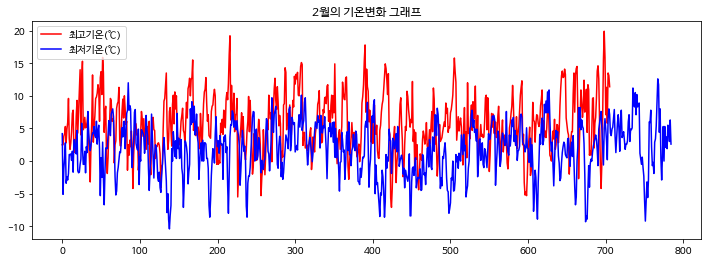

In [ ]:
# 2월의 최고 기온과 최저 기온 리스트를 만듭니다
fig, ax = plt.subplots(figsize = (12,4))
cch_df_2_high = cch_df.loc[2]['최고기온(℃)'].tolist()
print('2월의 최고기온 리스트: ',cch_df_2_high)
cch_df_2_low = cch_df.loc[1]['최고기온(℃)'].tolist()
print('2월의 최저기온 리스트: ',cch_df_2_low)
plt.title("2월의 기온변화 그래프")

plt.plot(cch_df_2_high,'r',label = '최고기온(℃)')
plt.plot(cch_df_2_low,'b',label = '최저기온(℃)')

plt.legend(loc = 2)
plt.show()


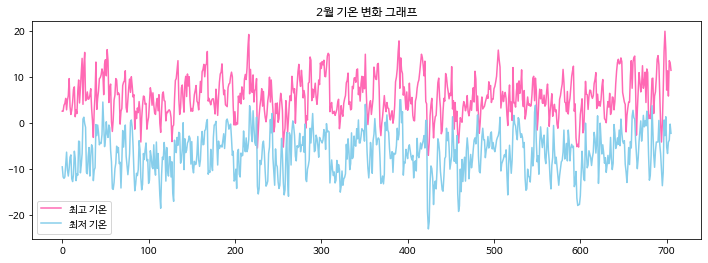

In [ ]:
# new_Date과 Birthday(2월 9일) 컬럼을 만듭니다
cch_df['new_Date'] = pd.to_datetime(cch_df['날짜'])
cch_df['today'] = cch_df['new_Date'].dt.to_period(freq = 'D')  
# to_period(freq = 'D')  연-월-일
# to_period(freq = 'M')  연-월
# to_period(freq = 'A')  연-월
cch_df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,today
월,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01,1997-01-01
1,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02,1997-01-02
1,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03,1997-01-03
1,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04,1997-01-04
1,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05,1997-01-05


In [ ]:
cch_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9141 entries, 1 to 1
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        9141 non-null   object        
 1   지점        9141 non-null   int64         
 2   평균기온(℃)   9140 non-null   float64       
 3   최저기온(℃)   9141 non-null   float64       
 4   최고기온(℃)   9141 non-null   float64       
 5   new_Date  9141 non-null   datetime64[ns]
 6   today     9141 non-null   period[D]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(1), period[D](1)
memory usage: 829.4+ KB


In [ ]:
cch_df['월일'] = pd.to_datetime(cch_df['날짜']).format='%Y_%m_%d'),dt.strftime('%m-%d')
cch_df

SyntaxError: ignored

In [ ]:
cch_df.set_index('월일',inplace=True)
cch_df

KeyError: ignored

[5.9, 0.4, 9.3, -4.2, 0.4, 4.8, 3.7, 5.8, 6.8, -2.1, 4.8, 2.2, 8.5, 3.6, 8.6, -3.3, -4.4, 3.0, 1.7, 3.7, 2.8, 1.8, 0.9, 4.5, 2.0]
[5.9, 0.4, 9.3, -4.2, 0.4, 4.8, 3.7, 5.8, 6.8, -2.1, 4.8, 2.2, 8.5, 3.6, 8.6, -3.3, -4.4, 3.0, 1.7, 3.7, 2.8, 1.8, 0.9, 4.5, 2.0]


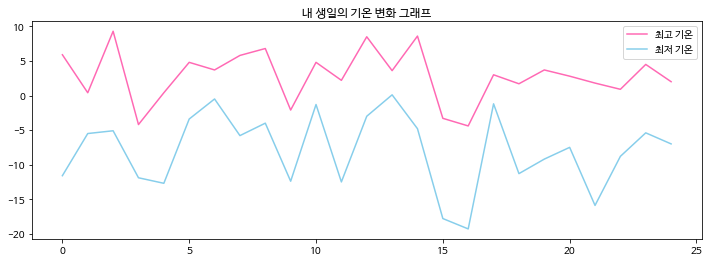

In [ ]:
cch_today = cch_df.loc['02-09']['최고기온(℃)']
plt.figure(figsize = (12,4))
plt.plot(cch_today, 'hotpink',label = 'today_high')
plt.plot(cch_df['날짜'],cch_df['최고기온(℃)'],'r',label = '최고기온(℃)')
plt.plot(cch_df['최저기온(℃)'],'b',label = '최저기온(℃)')
plt.title("*** 2월 9일 최고기온 ***")

plt.legend(loc = 1)
plt.show()

    ### 더 쉬운 방법

In [ ]:
cch_df['월'] = pd.to_datetime(cch_df['날짜']).dt.month
cch_df['일'] = pd.to_datetime(cch_df['날짜']).dt.day
cch_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,today,월,일
월,,,,,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2,1997-01-01,1997-01-01,1,1
1,1997-01-02,101,-8.7,-11.1,-5.1,1997-01-02,1997-01-02,1,2
1,1997-01-03,101,-8.1,-14.0,-1.2,1997-01-03,1997-01-03,1,3
1,1997-01-04,101,-6.8,-13.0,0.4,1997-01-04,1997-01-04,1,4
1,1997-01-05,101,-2.1,-5.4,2.8,1997-01-05,1997-01-05,1,5
...,...,...,...,...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5,2022-01-06,2022-01-06,1,6
1,2022-01-07,101,-4.9,-11.7,5.1,2022-01-07,2022-01-07,1,7
1,2022-01-08,101,-3.0,-11.3,3.0,2022-01-08,2022-01-08,1,8


In [ ]:
cch_df['월'] = dp.to_datetime(cch_df['날짜']),df_month
cch_df['월'] = dp.to_datetime(cch_df['날짜']),df_day
cch_df_2 = cch_df[cch_df['월'] == 2]
cch_df_2_9 = cch_df[cch_df['일'] == 9]
cch_df_2_high = cch_df['최고기온(℃)'].tolist()

plt.figure(figsize = (12,4))
plt.plot(cch_df_2_high,'hotpink',label = 'today_high')
plt.title("*.** 2월 9일 최고기온 ***")

plt.legend(loc = 1)
plt.show()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),new_Date,today,월,일
월,,,,,,,,,
1,1997-01-09,101,-8.0,-10.9,-1.9,1997-01-09,1997-01-09,1,9
2,1997-02-09,101,-1.4,-9.9,9.6,1997-02-09,1997-02-09,2,9
3,1997-03-09,101,6.2,-1.2,14.7,1997-03-09,1997-03-09,3,9
4,1997-04-09,101,10.5,4.8,15.8,1997-04-09,1997-04-09,4,9
5,1997-05-09,101,12.9,6.3,21.3,1997-05-09,1997-05-09,5,9
...,...,...,...,...,...,...,...,...,...
9,2021-09-09,101,21.7,17.7,28.1,2021-09-09,2021-09-09,9,9
10,2021-10-09,101,19.7,16.3,23.6,2021-10-09,2021-10-09,10,9
11,2021-11-09,101,5.5,3.1,7.4,2021-11-09,2021-11-09,11,9


In [ ]:
cch_df = pd.read_csv(file_path,encoding = 'cp949')
cch_df['월'] = pd.to_datetime(cch_df['날짜']),dt.month
cch_df['월'] = pd.to_datetime(cch_df['날짜']),dt.day
cch_df= cch_df[cch_df['월'] == 3]
cch_df = cch_df[cch_df['일'] == 12]
cch_df_2_high = cch_df['최고기온(℃)'].tolist()
cch_df_2_low = cch_df['최저기온(℃)'].tolist()
plt.figure(figsize = (12,4))
plt.plot(cch_df_2_high,'hotpink',label = 'today_high')
plt.plot(cch_df_2_low,'skyblue',label = 'today_low')
plt.title("*.** 2월 9일 최고기온 ***")

plt.legend(loc = 1)
plt.show()

NameError: ignored

In [ ]:
cch_df = pd.read_csv(file_path,encoding = 'cp949')
cch_df['월'] = pd.to_datetime(cch_df['날짜']),dt.month
cch_df['월'] = pd.to_datetime(cch_df['날짜']),dt.day

cch_df= cch_df[cch_df['월'] == 3]
cch_df = cch_df[cch_df['일'] == 12]

year = pd.to_datetime(cch_df['날짜']).dt.year.tolist()
cch_df_2_high = cch_df['최고기온(℃)'].tolist()
cch_df_2_low = cch_df['최저기온(℃)'].tolist()
cch_df_2_mean = cch_df['평균기온(℃)'].tolist()


plt.figure(figsize = (24,8))
plt.plot(year,cch_df_2_high,'hotpink',label = '최고기온')
plt.plot(year,cch_df_2_low,'skyblue',label = '최저기온')
plt.plot(year,cch_df_2_mean,'g',label = '평균기온')

plt.title("*.** 2월 9일 최고기온 ***")

plt.legend(loc = 1)
plt.show()


NameError: ignored

## 1-4.히스토그램으로 나타내기

### 히스토그램 리뷰

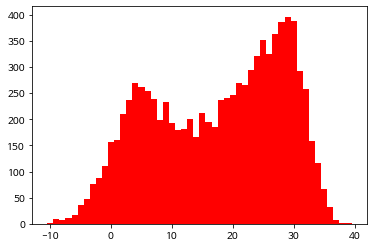

In [ ]:
cch_df = pd.read_csv(file_path,encoding = 'cp949')
plt.hist(cch_df['최고기온(℃)'].tolist(), bins = 50, color = 'r')
# bins : 구간 == 막대의 개수
plt.show()


### (1) 1월과 8월  데이터를 히스토그램으로 나타내기(pandas)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
1,1997-01-03,101,-8.1,-14.0,-1.2
1,1997-01-04,101,-6.8,-13.0,0.4
1,1997-01-05,101,-2.1,-5.4,2.8
...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5
1,2022-01-07,101,-4.9,-11.7,5.1
1,2022-01-08,101,-3.0,-11.3,3.0


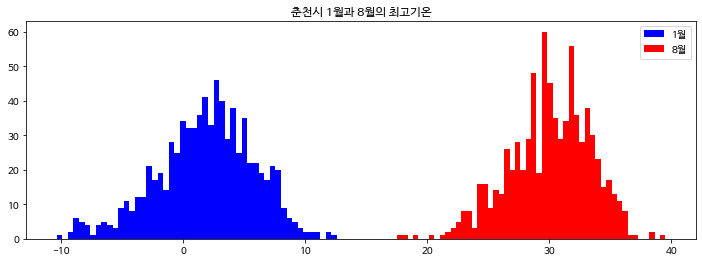

In [ ]:
#최고기온을 히스토그램으로 나타내기
cch_df = pd.read_csv(file_path,encoding = 'cp949')
cch_df['월'] = pd.to_datetime(cch_df['날짜']).dt.month
cch_df.set_index('월',inplace = True)
cch_df_1=cch_df.loc[1]['최고기온(℃)'].tolist()
cch_df_8=cch_df.loc[8]['최고기온(℃)'].tolist()

plt.figure(figsize = [12,4])
plt.title('춘천시 1월과 8월의 최고기온')
plt.hist(cch_df_1,bins=50,color='b',label='1월')
plt.hist(cch_df_8,bins=50,color='r',label='8월')

plt.legend(loc = 1)
cch_df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
월,,,,,
1,1997-01-01,101,-2.4,-9.8,4.2
1,1997-01-02,101,-8.7,-11.1,-5.1
1,1997-01-03,101,-8.1,-14.0,-1.2
1,1997-01-04,101,-6.8,-13.0,0.4
1,1997-01-05,101,-2.1,-5.4,2.8
...,...,...,...,...,...
1,2022-01-06,101,-4.1,-10.2,5.5
1,2022-01-07,101,-4.9,-11.7,5.1
1,2022-01-08,101,-3.0,-11.3,3.0


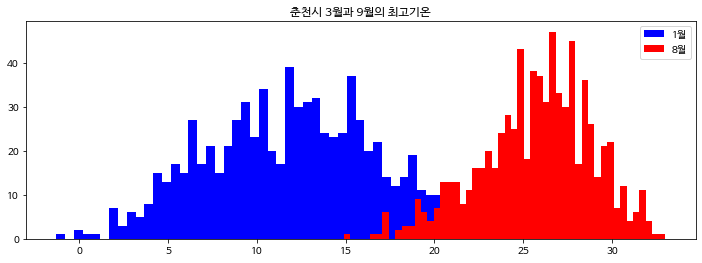

In [ ]:
cch_df = pd.read_csv(file_path,encoding = 'cp949')
cch_df['월'] = pd.to_datetime(cch_df['날짜']).dt.month
cch_df.set_index('월',inplace = True)
cch_df_3=cch_df.loc[3]['최고기온(℃)'].tolist()
cch_df_9=cch_df.loc[9]['최고기온(℃)'].tolist()

plt.figure(figsize = [12,4])
plt.title('춘천시 3월과 9월의 최고기온')
plt.hist(cch_df_3,bins=50,color='b',label='1월')
plt.hist(cch_df_9,bins=50,color='r',label='8월')

plt.legend(loc = 1)
cch_df

## 1-5.boxplot으로 나타내기

### (2) 월별 집계

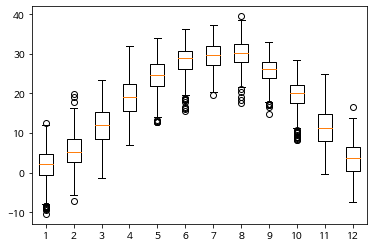

In [ ]:
fig,ax = plt.subplots()
ax.boxplot([cch_df.loc[i]['최고기온(℃)']for i in range(1,13)])

plt.show()

### (3) pandas를 이용해 날짜별 집계(매해 8월만)

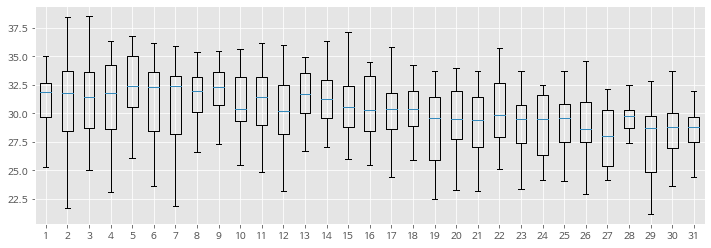